# Exercise 1 — K-means on Zoo (step by step)

We go little by little. Short text. Clear code. B1 English.

### 1.1 Read dataset

We read **zoo.data**. Then we look at shape and first rows.

In [4]:
import pandas as pd
cols=['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
zoo=pd.read_csv('Files-20250930 (2)/zoo.data',header=None,names=cols)
print('shape:',zoo.shape)
zoo.head(3)

shape: (101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


### 1.2 Select features (without class)

We remove `animal_name` and `type`. Only numeric features.

In [5]:
X=zoo.drop(columns=['animal_name','type']).copy()
print('X shape:',X.shape)
X.head(3)

X shape: (101, 16)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


### 1.3 Scale to same range

K-means uses distances. We scale to **0..1** with MinMax.

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
Xn=mm.fit_transform(X)
print('scaled shape:',Xn.shape)

scaled shape: (101, 16)


### 1.4 Run K-means for k=5,6,7,8 and 3 seeds

We compute **inertia (SSE)** and **silhouette**. We print mean per k.

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ks=[5,6,7,8];seeds=[0,1,2]
best_k=None;best_sil=-1;best_labels=None
print('k | mean_inertia | mean_silhouette')
for k in ks:
    inertias=[];sils=[]
    for s in seeds:
        km=KMeans(n_clusters=k,n_init=1,random_state=s,algorithm='lloyd')
        labels=km.fit_predict(Xn)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(Xn,labels))
        if sils[-1]>best_sil:
            best_sil=sils[-1];best_k=k;best_labels=labels
    print(k,'|',round(sum(inertias)/len(inertias),2),'|',round(sum(sils)/len(sils),3))
print('best k (by silhouette):',best_k,'sil=',round(best_sil,3))

k | mean_inertia | mean_silhouette
5 | 116.68 | 0.332
6 | 105.98 | 0.323
7 | 94.96 | 0.325
8 | 86.42 | 0.331
best k (by silhouette): 7 sil= 0.385


C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

### 1.5 Simple 2D plot

We show 2 attributes: `milk` and `feathers`. Colors = cluster id.

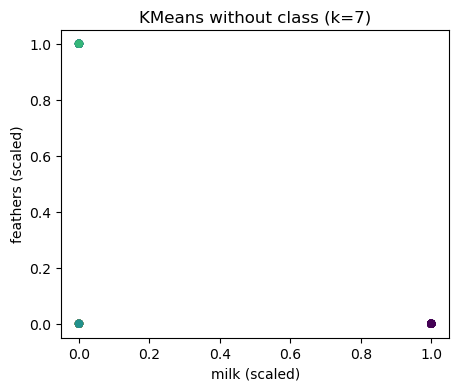

In [8]:
import matplotlib.pyplot as plt
ix_milk=list(X.columns).index('milk')
ix_feathers=list(X.columns).index('feathers')
plt.figure(figsize=(5,4))
plt.scatter(Xn[:,ix_milk],Xn[:,ix_feathers],c=best_labels,s=25)
plt.xlabel('milk (scaled)');plt.ylabel('feathers (scaled)')
plt.title(f'KMeans without class (k={best_k})')
plt.show()

### 1.6 Repeat including the class attribute

Now we include `type` as a feature. Same loop. Then we check clusters vs true type.

In [9]:
Xw=zoo.drop(columns=['animal_name']).copy()
Xw=MinMaxScaler().fit_transform(Xw)
best_k_w=None;best_sil_w=-1;best_labels_w=None
print('k | mean_inertia | mean_silhouette')
for k in ks:
    inertias=[];sils=[]
    for s in seeds:
        km=KMeans(n_clusters=k,n_init=1,random_state=s,algorithm='lloyd')
        labels=km.fit_predict(Xw)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(Xw,labels))
        if sils[-1]>best_sil_w:
            best_sil_w=sils[-1];best_k_w=k;best_labels_w=labels
    print(k,'|',round(sum(inertias)/len(inertias),2),'|',round(sum(sils)/len(sils),3))
print('best k (with class):',best_k_w,'sil=',round(best_sil_w,3))

k | mean_inertia | mean_silhouette
5 | 116.56 | 0.357
6 | 106.07 | 0.357
7 | 93.22 | 0.347
8 | 85.41 | 0.335
best k (with class): 7 sil= 0.382


C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [ ]:
# Cross table cluster vs true type
ct=pd.crosstab(pd.Series(best_labels_w,name='cluster'),pd.Series(zoo['type'].values,name='type'))
ct

# Exercise 2 — Agglomerative on Zoo (all linkages)

We test **single, complete, average, ward**. We try k=2..10. We print silhouette (internal) and ARI/MI (external).

### 2.1 Prepare data

We standardize features (include `type` to compare externally).

In [10]:
from sklearn.preprocessing import StandardScaler
Xs=StandardScaler().fit_transform(zoo.drop(columns=['animal_name']).copy())
y_true=zoo['type'].values
print('Xs shape:',Xs.shape)

Xs shape: (101, 17)


### 2.2 Scan k for each linkage

We print: k, silhouette, ARI, MI. We keep the best k by silhouette for each linkage.

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score,mutual_info_score
def scan_link(link):
    best={'k':None,'sil':-1,'labels':None}
    print('\nlinkage =',link)
    print('k | sil | ARI | MI')
    for k in range(2,11):
        if link=='ward':
            model=AgglomerativeClustering(n_clusters=k,linkage='ward')
        else:
            model=AgglomerativeClustering(n_clusters=k,linkage=link,metric='euclidean')
        labels=model.fit_predict(Xs)
        from sklearn.metrics import silhouette_score
        sil=silhouette_score(Xs,labels)
        ari=adjusted_rand_score(y_true,labels)
        mi=mutual_info_score(y_true,labels)
        print(k,'|',round(sil,3),'|',round(ari,3),'|',round(mi,3))
        if sil>best['sil']:
            best={'k':k,'sil':sil,'labels':labels}
    print('best k =',best['k'],'sil =',round(best['sil'],3))
    return best
b_single=scan_link('single')
b_complete=scan_link('complete')
b_average=scan_link('average')
b_ward=scan_link('ward')


linkage = single
k | sil | ARI | MI
2 | 0.211 | 0.007 | 0.023
3 | 0.164 | 0.016 | 0.048
4 | 0.217 | 0.222 | 0.481
5 | 0.267 | 0.428 | 0.838
6 | 0.26 | 0.444 | 0.865
7 | 0.267 | 0.443 | 0.88
8 | 0.258 | 0.436 | 0.88
9 | 0.241 | 0.453 | 0.91
10 | 0.245 | 0.47 | 0.939
best k = 5 sil = 0.267

linkage = complete
k | sil | ARI | MI
2 | 0.272 | 0.226 | 0.469
3 | 0.284 | 0.544 | 0.909
4 | 0.399 | 0.883 | 1.302
5 | 0.402 | 0.899 | 1.36
6 | 0.405 | 0.914 | 1.377
7 | 0.409 | 0.911 | 1.377
8 | 0.371 | 0.783 | 1.377
9 | 0.383 | 0.814 | 1.479
10 | 0.385 | 0.808 | 1.479
best k = 7 sil = 0.409

linkage = average
k | sil | ARI | MI
2 | 0.262 | 0.208 | 0.421
3 | 0.302 | 0.464 | 0.784
4 | 0.385 | 0.857 | 1.227
5 | 0.387 | 0.857 | 1.23
6 | 0.404 | 0.873 | 1.297
7 | 0.401 | 0.874 | 1.316
8 | 0.388 | 0.876 | 1.341
9 | 0.366 | 0.938 | 1.48
10 | 0.378 | 0.85 | 1.48
best k = 6 sil = 0.404

linkage = ward
k | sil | ARI | MI
2 | 0.29 | 0.448 | 0.675
3 | 0.34 | 0.716 | 1.035
4 | 0.396 | 0.872 | 1.267
5 | 0.409 |

### 2.3 Dendrograms

We draw one dendrogram per linkage (simple).

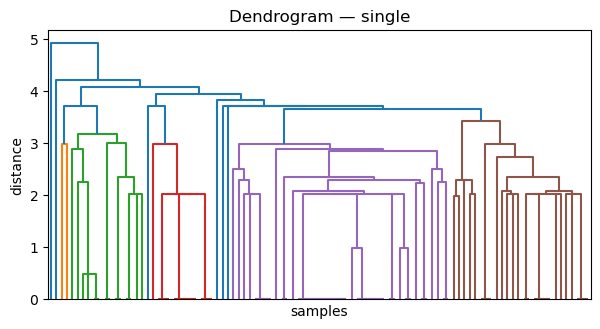

In [12]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
Z=linkage(Xs,method='single',metric='euclidean')
plt.figure(figsize=(7,3.5));dendrogram(Z,no_labels=True);plt.title('Dendrogram — single');plt.xlabel('samples');plt.ylabel('distance');plt.show()

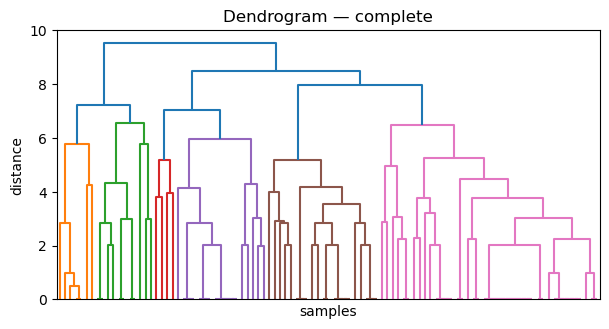

In [13]:
Z=linkage(Xs,method='complete',metric='euclidean')
plt.figure(figsize=(7,3.5));dendrogram(Z,no_labels=True);plt.title('Dendrogram — complete');plt.xlabel('samples');plt.ylabel('distance');plt.show()

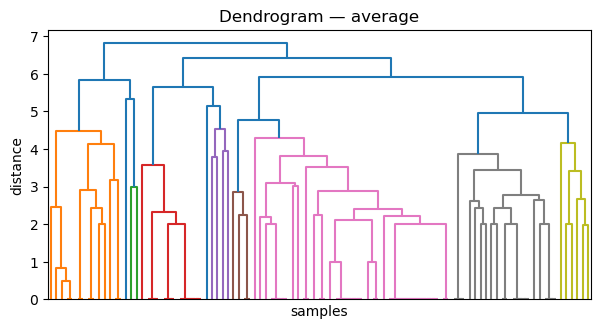

In [14]:
Z=linkage(Xs,method='average',metric='euclidean')
plt.figure(figsize=(7,3.5));dendrogram(Z,no_labels=True);plt.title('Dendrogram — average');plt.xlabel('samples');plt.ylabel('distance');plt.show()

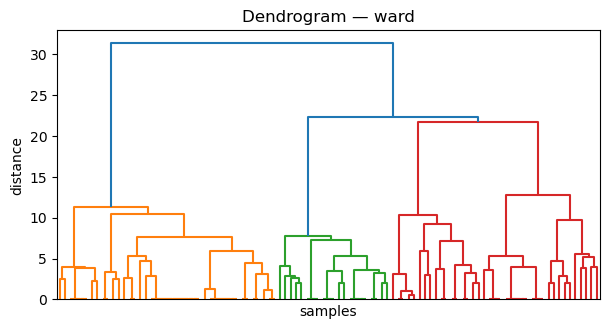

In [15]:
Z=linkage(Xs,method='ward')
plt.figure(figsize=(7,3.5));dendrogram(Z,no_labels=True);plt.title('Dendrogram — ward');plt.xlabel('samples');plt.ylabel('distance');plt.show()

# Exercise 3 — Verify DBSCAN from Problems (12 points)

We use ε=0.5 and MinPts=3. We mark **core**, **border**, **noise** and plot.

In [16]:
import numpy as np,math
P=np.array([[1.0,1.2],[0.8,1.1],[1.2,0.9],[8.0,8.5],[8.2,8.3],[7.9,8.1],[5.0,1.0],[5.2,1.1],[5.1,0.9],[3.0,6.0],[3.1,6.2],[2.9,5.9]])
eps=0.5;MinPts=3
from sklearn.cluster import DBSCAN
labels=DBSCAN(eps=eps,min_samples=MinPts).fit_predict(P)
def N_eps(i):
    ids=[]
    for j in range(len(P)):
        if math.dist(P[i],P[j])<=eps:ids.append(j)
    return ids
types=[]
for i in range(len(P)):
    N=N_eps(i)
    if len(N)>=MinPts:types.append('core')
    else:
        is_border=False
        for j in range(len(P)):
            if i==j:continue
            if len(N_eps(j))>=MinPts and i in N_eps(j):is_border=True;break
        types.append('border' if is_border else 'noise')
import pandas as pd
out=pd.DataFrame({'point':[f'P{i+1}' for i in range(len(P))],'x':P[:,0],'y':P[:,1],'label':labels,'type':types})
out

,point,x,y,label,type
0,P1,1.0,1.2,0,core
1,P2,0.8,1.1,0,core
2,P3,1.2,0.9,0,core
3,P4,8.0,8.5,1,core
4,P5,8.2,8.3,1,core
5,P6,7.9,8.1,1,core
6,P7,5.0,1.0,2,core
7,P8,5.2,1.1,2,core
8,P9,5.1,0.9,2,core
9,P10,3.0,6.0,3,core


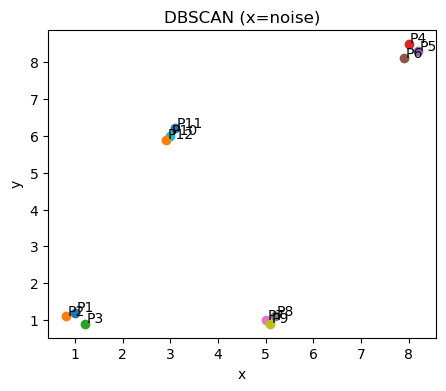

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
for i,(x,y) in enumerate(P):
    m='x' if labels[i]==-1 else 'o'
    plt.scatter(x,y,marker=m)
    plt.text(x+0.03,y+0.03,f'P{i+1}')
plt.title('DBSCAN (x=noise)');plt.xlabel('x');plt.ylabel('y');plt.show()

# Helper functions for images (we need them now)

We write `load_image`, `show_image`, `save_image`, `get_size`. Very short.

In [18]:
from PIL import Image
import os,numpy as np,matplotlib.pyplot as plt
def load_image(path):
    img=Image.open(path).convert('RGB')
    return np.array(img)
def show_image(image):
    plt.figure(figsize=(4,4));plt.imshow(image);plt.axis('off');plt.show()
def save_image(image,path,k):
    img=Image.fromarray(image)
    img.save(path+'.jpg',format='JPEG')
    img.save(path+'.png',format='PNG')
    indexed=img.convert('P',palette=Image.ADAPTIVE,colors=k)
    indexed.save(path+'compressed.png',optimize=True)
def get_size(path):
    return round(os.path.getsize(path)/1024,2)

# Apply K-means to reduce the number of colours

We read from `images/`. We save to `reduced_images/`. If folder is empty, we create one small sample.

In [19]:
from pathlib import Path
img_dir=Path('images');out_dir=Path('reduced_images');out_dir.mkdir(exist_ok=True)
if not img_dir.exists():img_dir.mkdir(exist_ok=True)
has_image=any(p.suffix.lower() in ['.png','.jpg','.jpeg'] for p in img_dir.iterdir())
if not has_image:
    arr=np.zeros((128,128,3),dtype=np.uint8)
    arr[:,:64,:]=[210,60,60];arr[:,64:,:]=[40,160,80]
    Image.fromarray(arr).save(img_dir/'sample.png')
def is_landscape(img):h,w,_=img.shape;return w>h
from sklearn.cluster import KMeans
def kmeans_quantize(img,k,seed=0):
    px=img.reshape(-1,3).astype(float)
    km=KMeans(n_clusters=k,n_init=1,random_state=seed)
    lab=km.fit_predict(px)
    centers=km.cluster_centers_.astype(np.uint8)
    new_px=centers[lab]
    return new_px.reshape(img.shape)

In [20]:
records=[]
for p in img_dir.iterdir():
    if p.suffix.lower() not in ['.png','.jpg','.jpeg']:continue
    img=load_image(str(p))
    ks=[5,10,20] if is_landscape(img) else [3,5,10,16,20,32,50,64]
    base=p.stem
    for k in ks:
        reduced=kmeans_quantize(img,k,seed=42)
        save_base=out_dir/f'{base}_{k}'
        save_image(reduced,str(save_base),k)
        records.append({'image':base,'k':k,'KB_jpg':get_size(str(save_base)+'.jpg'),'KB_png':get_size(str(save_base)+'.png'),'KB_png_compressed':get_size(str(save_base)+'compressed.png')})
print('Saved:',len(records),'files')

C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\FERIA\anaconda3\Lib\site-packages

Saved: 24 files


C:\Users\FERIA\anaconda3\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


# Size (KB) vs k

For each image we plot size vs k (JPG, PNG, PNG palette). Short comment at the end.

,image,k,KB_jpg,KB_png,KB_png_compressed
0,gradient,3,2.44,0.75,0.16
1,gradient,5,3.03,0.77,0.24
2,gradient,10,3.50,0.79,0.27
3,gradient,16,4.24,0.80,0.32
4,gradient,20,4.08,0.80,0.47


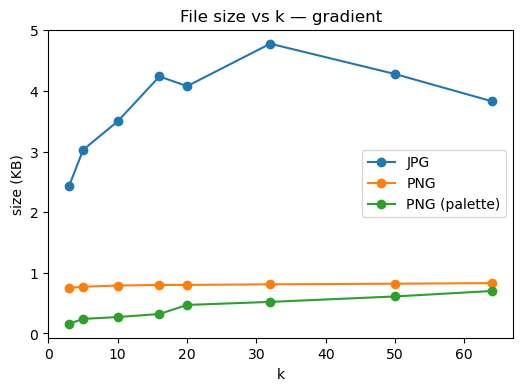

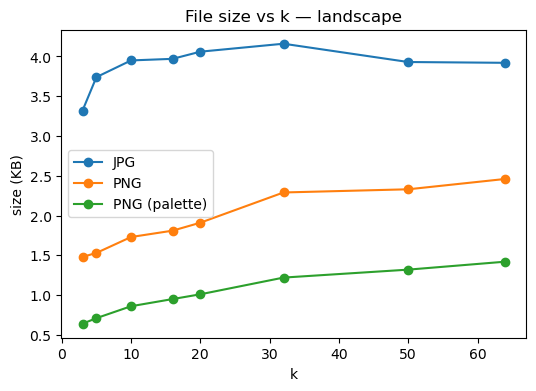

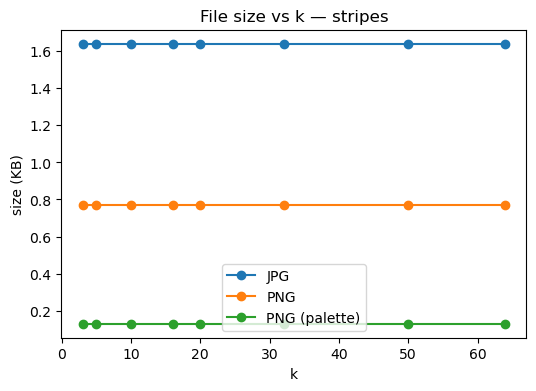

Comment: small k -> PNG palette is tiny. JPG may change less. Each image behaves different.


In [21]:
import pandas as pd,matplotlib.pyplot as plt
df=pd.DataFrame(records)
display(df.head())
for name,sub in df.groupby('image'):
    sub=sub.sort_values('k')
    plt.figure(figsize=(6,4))
    plt.plot(sub['k'],sub['KB_jpg'],marker='o',label='JPG')
    plt.plot(sub['k'],sub['KB_png'],marker='o',label='PNG')
    plt.plot(sub['k'],sub['KB_png_compressed'],marker='o',label='PNG (palette)')
    plt.title(f'File size vs k — {name}');plt.xlabel('k');plt.ylabel('size (KB)');plt.legend();plt.show()
print('Comment: small k -> PNG palette is tiny. JPG may change less. Each image behaves different.')

# PCA — Reduce input space (faces)

We try to load `faces.mat`. If not, we make a small synthetic example. We show 25 original, then 25 reconstructed with 100 comps. Then elbow.

X shape: (25, 1024)
Original (first 25):


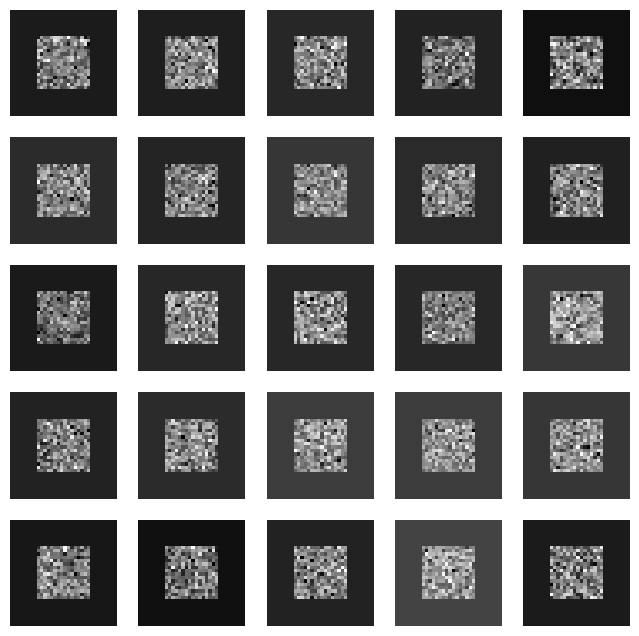

In [22]:
import numpy as np,scipy.io as sio,matplotlib.pyplot as plt
from pathlib import Path
def display_grid(X,max_n=25):
    w=int(np.round(np.sqrt(X.shape[1])));h=X.shape[1]//w
    n=min(max_n,X.shape[0])
    rows=int(np.floor(np.sqrt(n)));cols=int(np.ceil(n/rows))
    fig,ax=plt.subplots(rows,cols,figsize=(8,8));idx=0
    for r in range(rows):
        for c in range(cols):
            a=ax[r,c] if rows>1 else ax[c]
            if idx>=n:a.axis('off');continue
            a.imshow(X[idx].reshape(h,w),cmap='gray');a.axis('off');idx+=1
    plt.show()
faces_path=Path('/mnt/data/faces.mat')
if faces_path.exists():
    mat=sio.loadmat(str(faces_path))
    X=None
    if 'X' in mat and isinstance(mat['X'],np.ndarray) and mat['X'].ndim==2:X=mat['X']
    else:
        for k,v in mat.items():
            if isinstance(v,np.ndarray) and v.ndim==2:X=v;break
    if X is None:X=np.random.randint(0,255,(25,1024)).astype(float)
else:
    X=[]
    for i in range(25):
        img=np.zeros((32,32),dtype=float);img[8:24,8:24]=80+40*np.random.randn(16,16);X.append(img.reshape(-1))
    X=np.vstack(X)
print('X shape:',X.shape);print('Original (first 25):');display_grid(X,25)

In [ ]:
# Standardize, fit PCA(100), reconstruct, show
from sklearn.decomposition import PCA
Xs=(X-X.mean(axis=0,keepdims=True))/(X.std(axis=0,keepdims=True)+1e-8)
pca=PCA(n_components=100,random_state=42)
Z=pca.fit_transform(Xs)
Xrec=pca.inverse_transform(Z)
print('Reconstructed (first 25):');display_grid(Xrec,25)

In [ ]:
# Elbow plot
evr=pca.explained_variance_ratio_
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,len(evr)+1),np.cumsum(evr),marker='o')
plt.xlabel('components');plt.ylabel('cumulative explained variance')
plt.title('PCA elbow');plt.show()

# PCA as preprocessing (quick test)

We use digits. Compare KNN without PCA vs with PCA(20).

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digits=load_digits()
X=digits.data.astype(float);y=digits.target
X=(X-X.mean(axis=0,keepdims=True))/(X.std(axis=0,keepdims=True)+1e-8)
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
knn=KNeighborsClassifier(n_neighbors=5);knn.fit(Xtr,ytr);acc0=knn.score(Xte,yte)
from sklearn.decomposition import PCA
p=PCA(n_components=20,random_state=42)
Xtrp=p.fit_transform(Xtr);Xtep=p.transform(Xte)
knn2=KNeighborsClassifier(n_neighbors=5);knn2.fit(Xtrp,ytr);acc1=knn2.score(Xtep,yte)
print('KNN acc without PCA:',round(acc0,3))
print('KNN acc with PCA(20):',round(acc1,3))